In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# 1
df = pd.read_csv("medical_examination.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df['overweight'] = np.where(
    (df['weight'] / ((df['height'] / 100) ** 2)) > 25,  # BMI > 25
    1,  # Overweight
    0   # Not overweight
)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [6]:
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'],
      dtype='object')

3

In [9]:
# Normalize Cholesterol
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, df['cholesterol']) 
df['cholesterol'] = np.where(df['cholesterol'] > 1, 1, df['cholesterol'])

In [10]:
# Normalize gluc
df['gluc'] = np.where(df['gluc'] == 1, 0, df['gluc'])
df['gluc'] = np.where(df['gluc'] > 1, 1, df['gluc'])

4

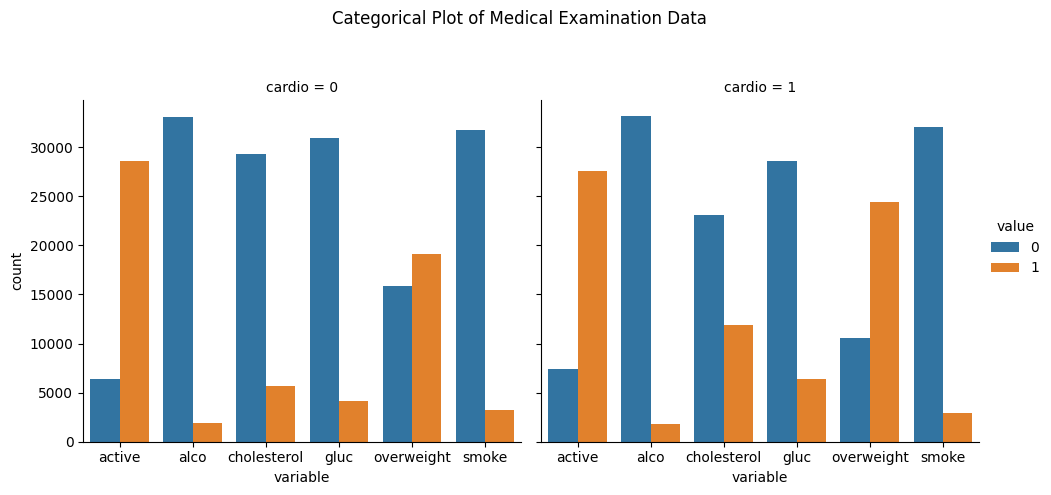

In [13]:
def draw_cat_plot():
    # 5. Create a DataFrame for the cat plot using pd.melt
    df_cat = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    
    # 6. Group and reformat the data in df_cat to split it by cardio
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='count')
    
    # 7. Convert the data into long format and create a chart that shows the value counts
    fig = sns.catplot(data=df_cat, x='variable', y='count', hue='value', col='cardio', kind='bar')
    
    # 8. Get the figure for the output and store it in the fig variable
    plt.subplots_adjust(top=0.8)  # Adjust the top to fit the title
    fig.fig.suptitle('Categorical Plot of Medical Examination Data')
    
    plt.show()

draw_cat_plot()

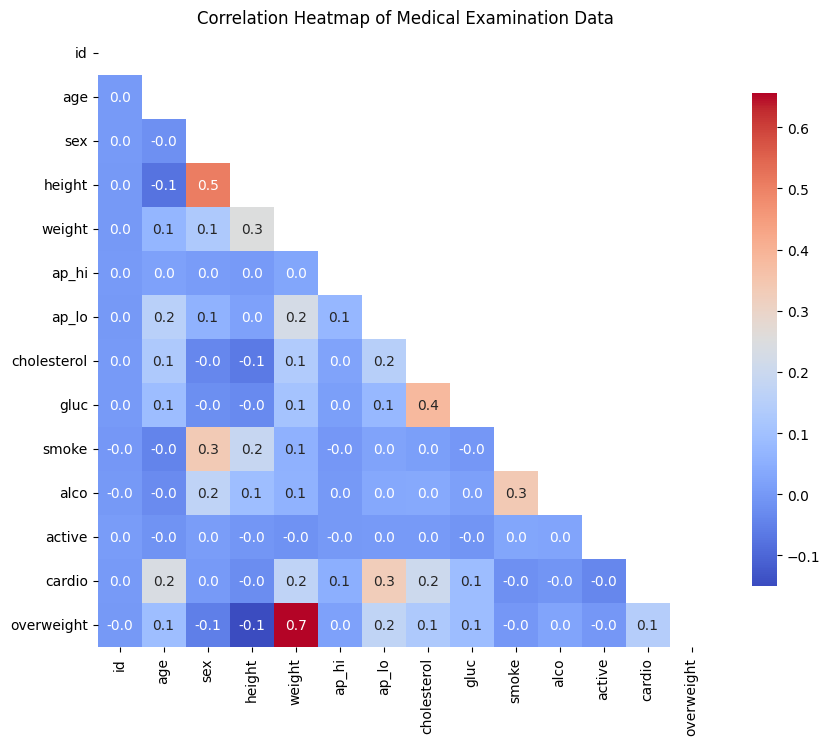

In [15]:
def draw_heat_map():
    # 10. Clean the data in the df_heat variable
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025)) & 
                 (df['height'] <= df['height'].quantile(0.975)) & 
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] <= df['weight'].quantile(0.975))]

    # 11. Calculate the correlation matrix and store it in the corr variable
    corr = df_heat.corr()

    # 12. Generate a mask for the upper triangle and store it in the mask variable
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 13. Set up the matplotlib figure
    plt.figure(figsize=(10, 8))

    # 14. Plot the correlation matrix using the method provided by the seaborn library
    fig = sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

    plt.title('Correlation Heatmap of Medical Examination Data')
    plt.show()

# Call the function to draw the heat map
draw_heat_map()
